# [Participación en clase 11] ejercicio mínimos cuadrados
## Resuelva el siguiente ejercicio: 

### Realizado por: Correa Adrian
### Fecha: 23/01/2025
### link de GitHub: https://github.com/afca2002/Participacion-En-Clase-11.git


## Prueba 02
Interpole los siguientes conjuntos de datos con la función correspondiente. 

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [1]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

# Conjunto de datos de ejemplo

In [2]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

In [3]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

[01-23 18:43:27][INFO] 2025-01-23 18:43:27.383135


[01-23 18:43:32][INFO] 2025-01-23 18:43:32.688143
[01-23 18:43:32][INFO] Se ajustarán 2 parámetros.
[01-23 18:43:32][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


[01-23 18:43:39][INFO] Se ajustarán 2 parámetros.
[01-23 18:43:39][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


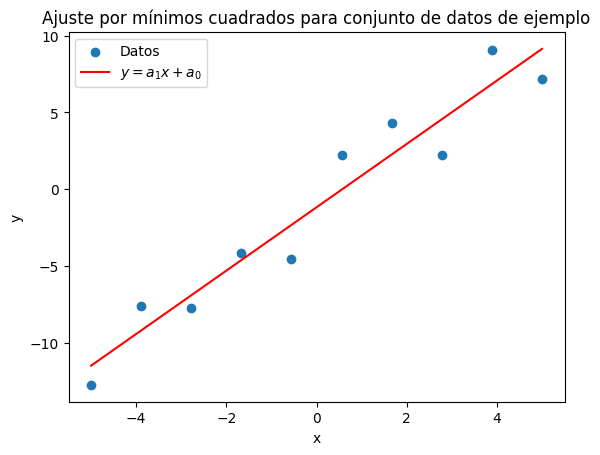

In [4]:
import numpy as np
import matplotlib.pyplot as plt

m, b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

x = np.linspace(-5, 5, 100)

y = [m * xi + b for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos de ejemplo")
plt.legend()
plt.show()

## Conjunto de datos 1

In [5]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

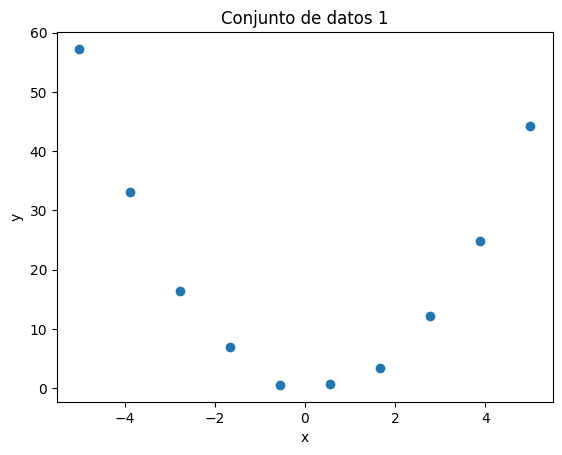

In [ ]:
plt.scatter(xs1, ys1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

Interpole el conjunto de datos 1 usando la función cuadrática. 

In [9]:
def der_parcial_0_cuad(xs: list[float], ys: list[float]) -> tuple[float, float, float, float]:
    """
    Ecuación lineal al derivar E wrt a0:
        (N)*a0 + (sum(x))*a1 + (sum(x^2))*a2 = sum(y).
    Retorna (c0, c1, c2, c_ind).
    """
    N = len(xs)
    sumX = sum(xs)
    sumX2 = sum(x**2 for x in xs)
    sumY = sum(ys)

    return (N, sumX, sumX2, sumY)


In [10]:
def der_parcial_1_cuad(xs: list[float], ys: list[float]) -> tuple[float, float, float, float]:
    """
    Ecuación lineal al derivar E wrt a1:
        (sum(x))*a0 + (sum(x^2))*a1 + (sum(x^3))*a2 = sum(x*y).
    """
    sumX   = sum(xs)
    sumX2  = sum(x**2 for x in xs)
    sumX3  = sum(x**3 for x in xs)
    sumXY  = sum(x*y for x,y in zip(xs, ys))

    return (sumX, sumX2, sumX3, sumXY)


In [11]:
def der_parcial_2_cuad(xs: list[float], ys: list[float]) -> tuple[float, float, float, float]:
    """
    Ecuación lineal al derivar E wrt a2:
        (sum(x^2))*a0 + (sum(x^3))*a1 + (sum(x^4))*a2 = sum(x^2*y).
    """
    sumX2  = sum(x**2 for x in xs)
    sumX3  = sum(x**3 for x in xs)
    sumX4  = sum(x**4 for x in xs)
    sumX2Y = sum((x**2)*y for x,y in zip(xs, ys))

    return (sumX2, sumX3, sumX4, sumX2Y)


In [12]:
from src import ajustar_min_cuadrados  # la rutina genérica que resuelve el sistema


In [21]:
# Ajuste y obtención de parámetros
a0, a1, a2 = ajustar_min_cuadrados(
    xs1, ys1,
    gradiente=[der_parcial_0_cuad, der_parcial_1_cuad, der_parcial_2_cuad]
)

print("Parámetros obtenidos:")
print(f"a2 = {a2}, a1 = {a1}, a0 = {a0}")

# Cálculo de y(2.25) y y(-2.25)
x1 = 2.25
x2 = -2.25
y_x1 = a2 * (x1**2) + a1 * x1 + a0
y_x2 = a2 * (x2**2) + a1 * x2 + a0

print(f"y(2.25) = {y_x1}")
print(f"y(-2.25) = {y_x2}")


[01-23 19:13:09][INFO] Se ajustarán 3 parámetros.
[01-23 19:13:09][INFO] 
[[ 1.00000000e+01  0.00000000e+00  1.01852593e+02  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [ 1.42108547e-14  0.00000000e+00  8.04750617e+02  1.62914559e+03]]
[01-23 19:13:09][INFO] 
[[ 1.00000000e+01  0.00000000e+00  1.01852593e+02  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [ 1.42108547e-14  0.00000000e+00  8.04750617e+02  1.62914559e+03]]
Parámetros obtenidos:
a2 = 2.024410482925083, a1 = -1.123325129575543, a0 = -0.6382556172537732
y(2.25) = 7.0828409110094865
y(-2.25) = 12.137803994099432


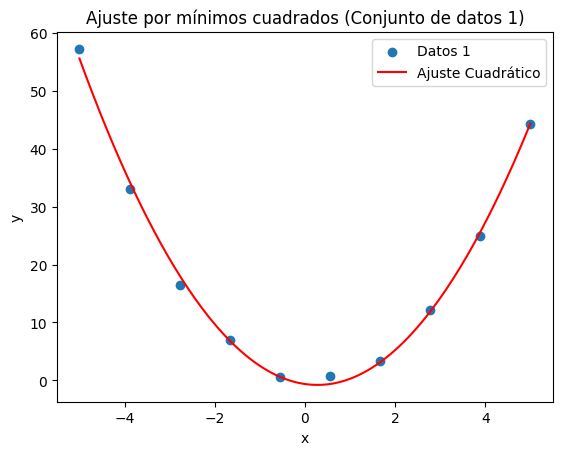

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Ejemplo: 
x_plot = np.linspace(-5, 5, 200)
y_plot = [a2*(xx**2) + a1*xx + a0 for xx in x_plot]

plt.scatter(xs1, ys1, label="Datos 1")
plt.plot(x_plot, y_plot, color="red", label="Ajuste Cuadrático")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados (Conjunto de datos 1)")
plt.legend()
plt.show()


## Conjunto de datos 2

In [7]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

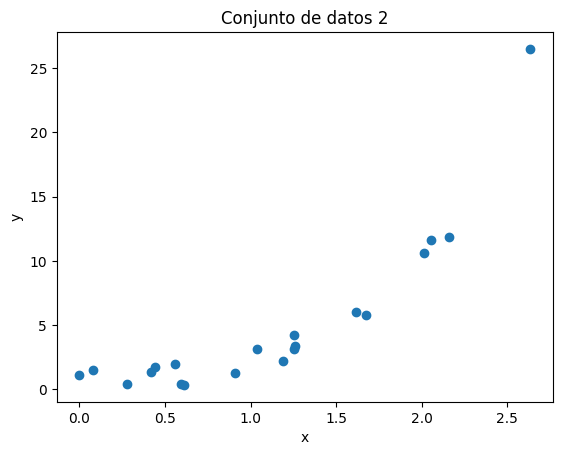

In [8]:
plt.scatter(xs2, ys2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2")
plt.show()

Interpole el conjunto de datos 2 usando la función exponencial. 

Parametros del modelo y = a exp(bx):
a = 0.5440855388147079, b = 1.417160366705542
y(1) = 2.2445646053759503
y(5) = 650.1174439111655


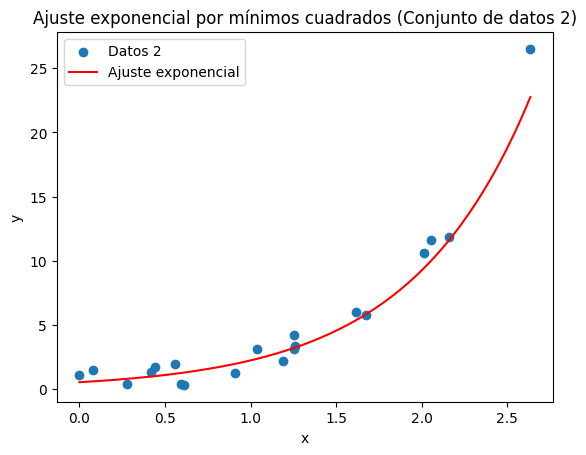

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Conjunto de datos 2
xs2 = np.array([
    0.0003, 0.0822, 0.2770, 0.4212, 0.4403,
    0.5588, 0.5943, 0.6134, 0.9070, 1.0367,
    1.1903, 1.2511, 1.2519, 1.2576, 1.6165,
    1.6761, 2.0114, 2.0557, 2.1610, 2.6344
])
ys2 = np.array([
    1.1017, 1.5021, 0.3844, 1.3251, 1.7206,
    1.9453, 0.3894, 0.3328, 1.2887, 3.1239,
    2.1778, 3.1078, 4.1856, 3.3640, 6.0330,
    5.8088, 10.5890, 11.5865, 11.8221, 26.5077
])

# Tomar logaritmo de y
lny = np.log(ys2)

# Ajuste "lineal" en X = xs2, Y = ln(y)
# polyfit(x, Y, grado=1) => slope (b), intercept (A)
b, A = np.polyfit(xs2, lny, 1)
a = np.exp(A)  # recuperamos 'a' a partir de A = ln(a)

print(f"Parametros del modelo y = a exp(bx):")
print(f"a = {a}, b = {b}")

y1 = a * np.exp(b * 1)
y5 = a * np.exp(b * 5)

print(f"y(1) = {y1}")
print(f"y(5) = {y5}")

# Graficar
x_plot = np.linspace(min(xs2), max(xs2), 200)
y_plot = a * np.exp(b * x_plot)

plt.scatter(xs2, ys2, label="Datos 2")
plt.plot(x_plot, y_plot, "r", label="Ajuste exponencial")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste exponencial por mínimos cuadrados (Conjunto de datos 2)")
plt.legend()
plt.show()
